In [4]:
# import package
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns

%matplotlib inline
import zipfile
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# # LightGBM import
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# import gc
# from itertools import chain

In [10]:
#load in the file (application_train.csv)
app_train = pd.read_csv('/Users/amy/Desktop/project data/application_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

app_test = pd.read_csv('/Users/amy/Desktop/project data/application_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


categorical_feats = [
    f for f in app_train.columns if app_train[f].dtype == 'object']

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(app_train[col].values.astype('str')) + list(app_test[col].values.astype('str')))
    app_train[col] = lb.transform(list(app_train[col].values.astype('str')))
    app_test[col] = lb.transform(list(app_test[col].values.astype('str')))
    
    
app_train.fillna(-999, inplace = True)

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(app_train.drop(['SK_ID_CURR', 'TARGET'],axis=1), app_train.TARGET)
features = app_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [75]:
#Print the name and gini importance of each feature
for name, importance in zip(features, rf.feature_importances_):
    print(name, "=", importance)


NAME_CONTRACT_TYPE = 0.0010606096106813262
CODE_GENDER = 0.013514977295662424
FLAG_OWN_CAR = 0.001368655288659589
FLAG_OWN_REALTY = 0.00021128098029017341
CNT_CHILDREN = 0.000705350165050559
AMT_INCOME_TOTAL = 0.005516141934181211
AMT_CREDIT = 0.009833485679905406
AMT_ANNUITY = 0.013036317019276902
AMT_GOODS_PRICE = 0.010690091367919978
NAME_TYPE_SUITE = 0.0010964333489407077
NAME_INCOME_TYPE = 0.006363348862731258
NAME_EDUCATION_TYPE = 0.01844010404111723
NAME_FAMILY_STATUS = 0.0014889531784139575
NAME_HOUSING_TYPE = 0.0014381562499777064
REGION_POPULATION_RELATIVE = 0.004512996186032358
DAYS_BIRTH = 0.04769414128072249
DAYS_EMPLOYED = 0.02097869140835851
DAYS_REGISTRATION = 0.011025641227141648
DAYS_ID_PUBLISH = 0.014002708099649534
OWN_CAR_AGE = 0.00397513285078541
FLAG_MOBIL = 0.0
FLAG_EMP_PHONE = 0.0024024539875831157
FLAG_WORK_PHONE = 0.000387306796307187
FLAG_CONT_MOBILE = 0.00010225525700721362
FLAG_PHONE = 0.00020052632078242726
FLAG_EMAIL = 0.00029655498723427635
OCCUPATION_T

In [70]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.0003
sfm = SelectFromModel(rf, prefit=True,threshold=0.0003)


# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_EMP_PHONE
FLAG_WORK_PHONE
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ENTRANCES_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMEN

In [91]:
# keep the columns that are the most importance 

# convert the most importance columns into a list
results = []
for feature_list_index in sfm.get_support(indices=True):
    results.append(features[feature_list_index])
    
# put all the data from most importance features into a list    
df_noTargetValue = []
for r in results:
    df_noTargetValue.append(app_train[r])

# convert the list to a dataframe
app_train_RFupdate_NoTarget = pd.DataFrame(df_noTargetValue).T



In [92]:
# (without Target column) DataFrame after remover feature after random forest feature selection method
app_train_RFupdate_NoTarget.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,0,202500,406598,24700.5,351000,Unaccompanied,Working,...,2,-1134,1,0,0,0,0,0,0,1
1,Cash loans,F,N,0,270000,1.2935e+06,35698.5,1.1295e+06,Family,State servant,...,0,-828,1,0,0,0,0,0,0,0
2,Revolving loans,M,Y,0,67500,135000,6750,135000,Unaccompanied,Working,...,0,-815,0,0,0,0,0,0,0,0
3,Cash loans,F,N,0,135000,312682,29686.5,297000,Unaccompanied,Working,...,0,-617,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,0,121500,513000,21865.5,513000,Unaccompanied,Working,...,0,-1106,0,0,0,0,0,0,0,0


In [94]:
# Creating dataframe that has the TARGET column 

results2 = []
for feature_list_index in sfm.get_support(indices=True):
    results2.append(features[feature_list_index])

# adding TARGET to the list
results2.append('TARGET')


# put all the data from most importance features into a list    
df_TargetValue = []
for r in results2:
    df_TargetValue.append(app_train[r])

# convert the list to a dataframe
app_train_RFupdate_withTarget = pd.DataFrame(df_TargetValue).T

In [147]:
# (with Target column) DataFrame after remover feature after random forest feature selection method
app_train_RFupdate_withTarget.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,0,202500,406598,24700.5,351000,Unaccompanied,Working,...,-1134,1,0,0,0,0,0,0,1,1
1,Cash loans,F,N,0,270000,1.2935e+06,35698.5,1.1295e+06,Family,State servant,...,-828,1,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,0,67500,135000,6750,135000,Unaccompanied,Working,...,-815,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,0,135000,312682,29686.5,297000,Unaccompanied,Working,...,-617,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,0,121500,513000,21865.5,513000,Unaccompanied,Working,...,-1106,0,0,0,0,0,0,0,0,0


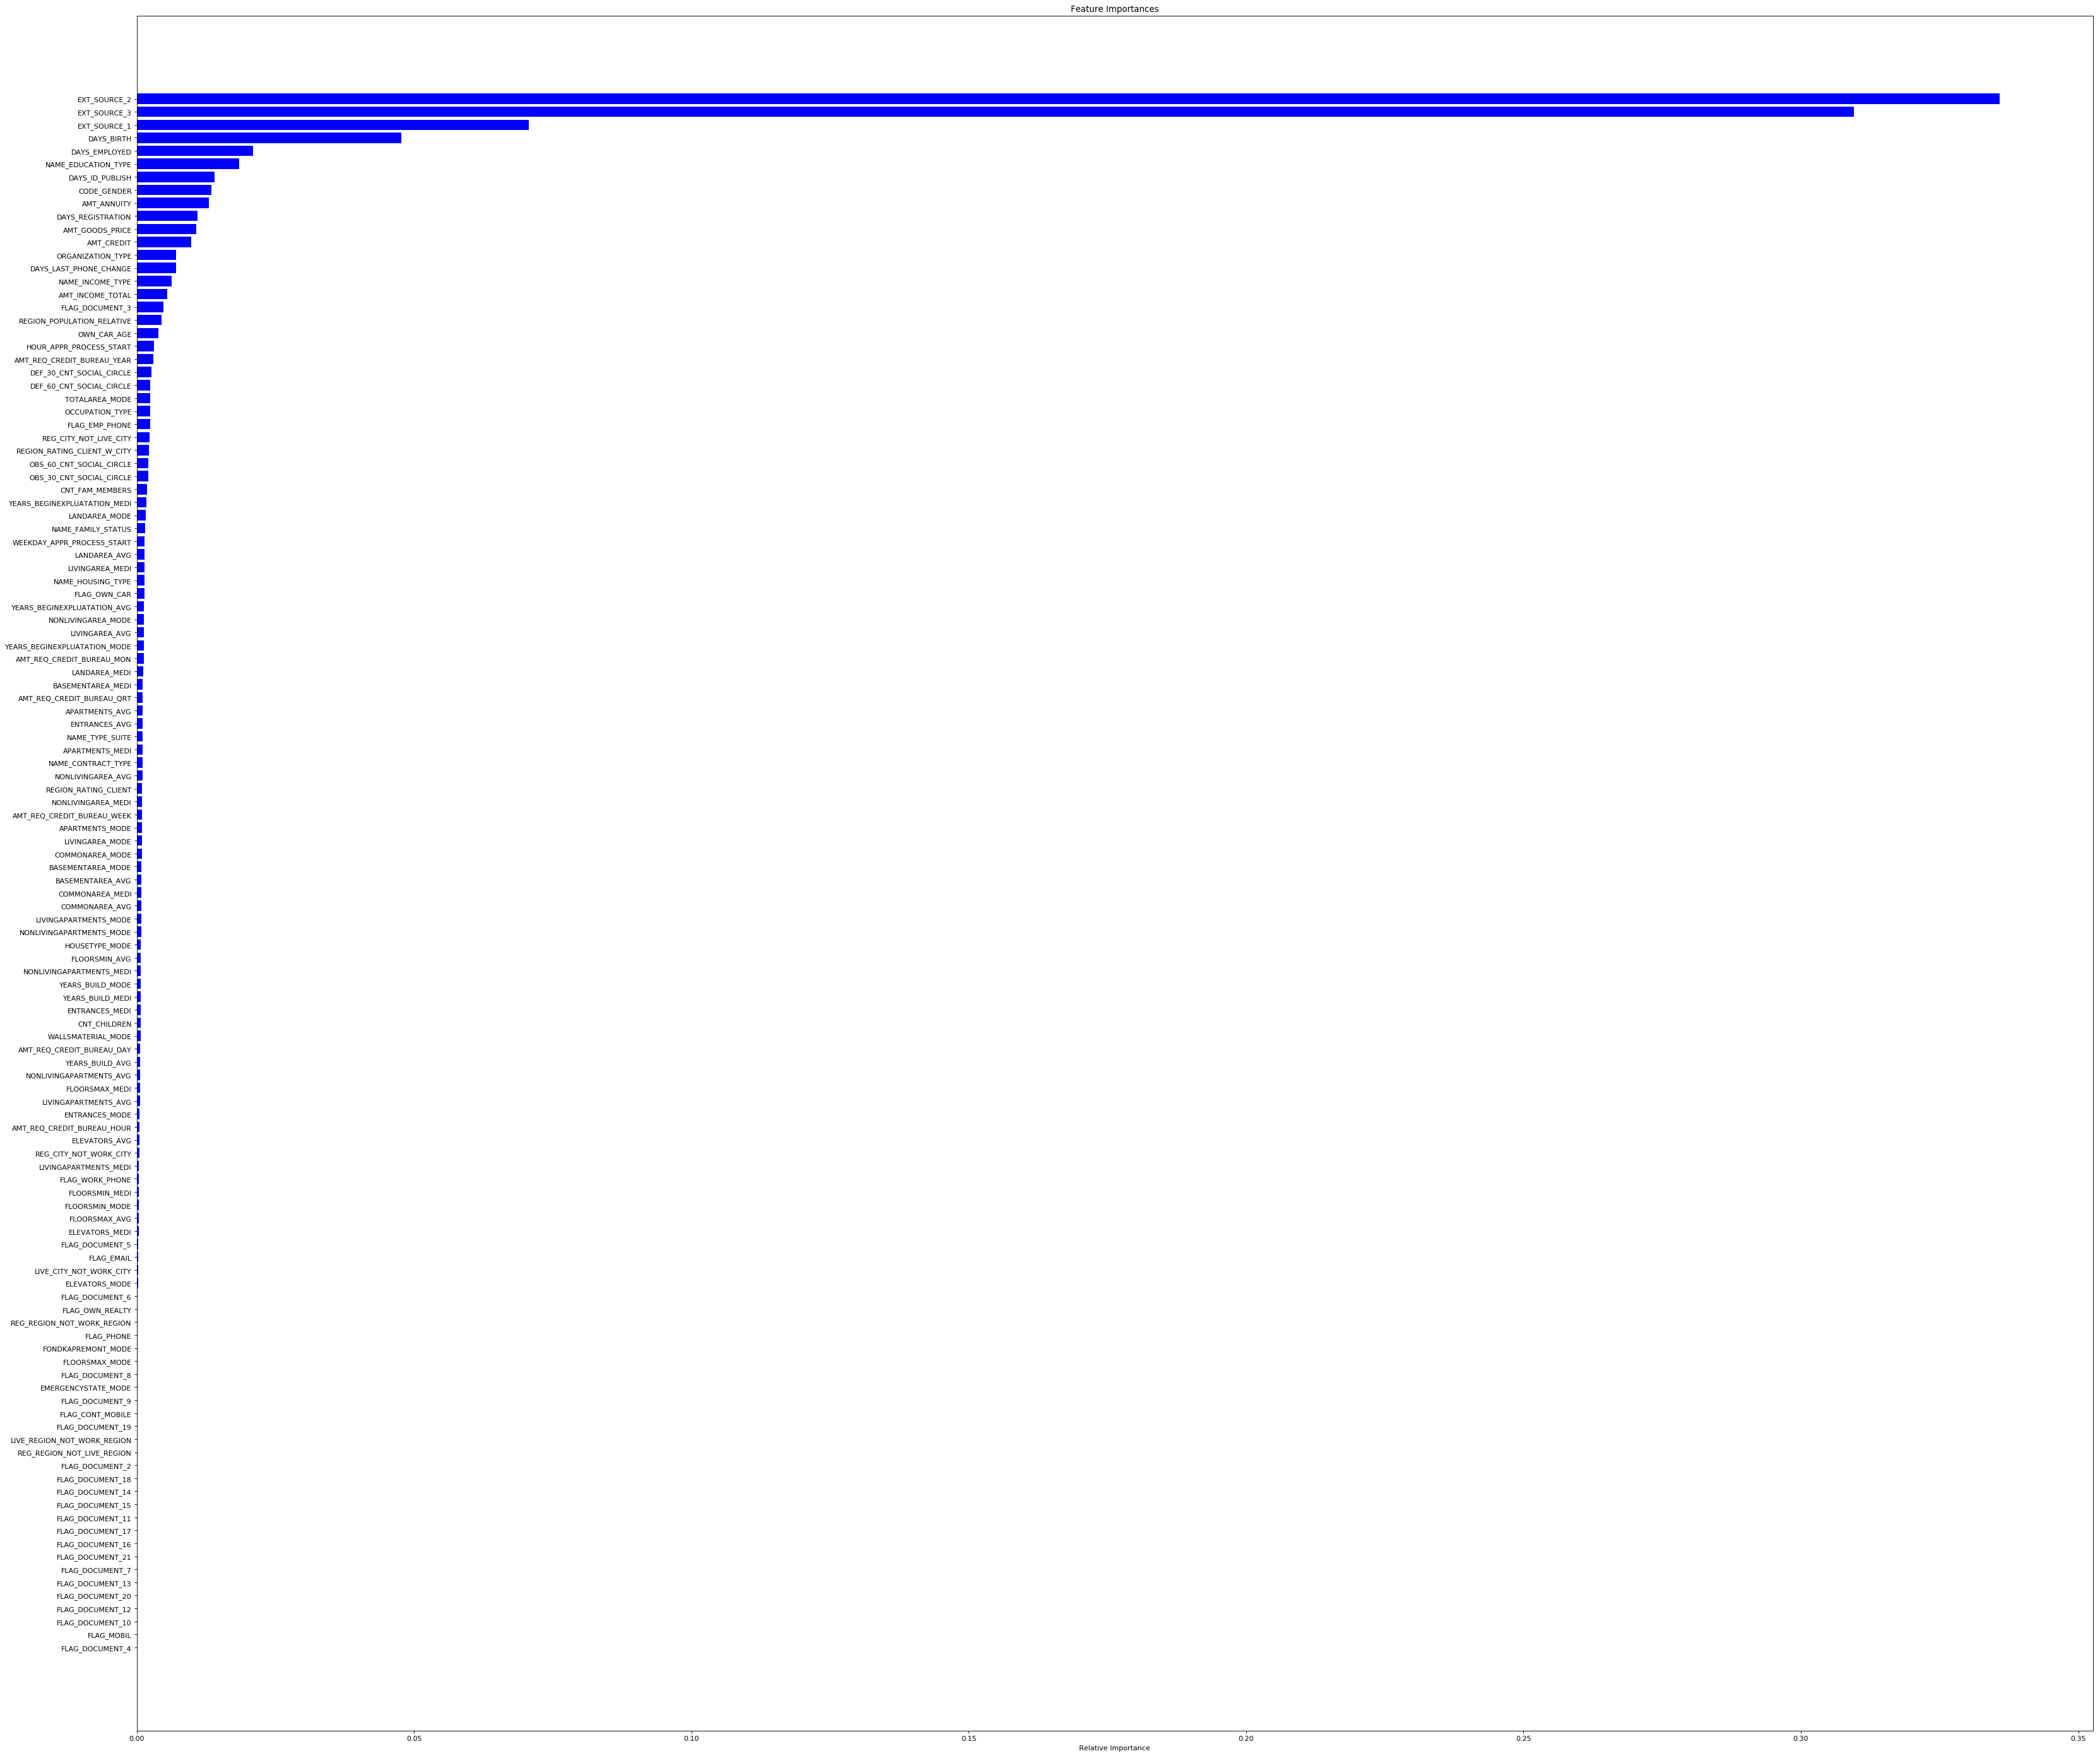

In [43]:
# visualize on the gini index 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

importances = rf.feature_importances_
indices = np.argsort(importances)
figure(num=None, figsize=(50, 45), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# visualize the missing value
sns.heatmap(app_train.isnull(), cbar=False)
plt.show()

In [68]:
#Percentage of missing value in each column
(app_train.isnull().sum() * 100/ len(app_train)).sort_values(ascending=False).head(20)

LANDAREA_MODE         59.376738
LANDAREA_AVG          59.376738
LANDAREA_MEDI         59.376738
BASEMENTAREA_MODE     58.515956
BASEMENTAREA_AVG      58.515956
BASEMENTAREA_MEDI     58.515956
EXT_SOURCE_1          56.381073
NONLIVINGAREA_MEDI    55.179164
NONLIVINGAREA_AVG     55.179164
NONLIVINGAREA_MODE    55.179164
ELEVATORS_AVG         53.295980
ELEVATORS_MEDI        53.295980
WALLSMATERIAL_MODE    50.840783
APARTMENTS_MEDI       50.749729
APARTMENTS_MODE       50.749729
APARTMENTS_AVG        50.749729
ENTRANCES_AVG         50.348768
ENTRANCES_MODE        50.348768
ENTRANCES_MEDI        50.348768
LIVINGAREA_MEDI       50.193326
dtype: float64

In [69]:
# Since all the column has already been remove from the random forest result, no action taken


# # dropping column which has more than 60% missing value
# app_train_RFupdate.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI',
#                'NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG',
#                'FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','OWN_CAR_AGE'], axis=1, inplace=True)

In [146]:
import pandas as pd
import numpy as np

from sklearn import datasets, metrics, cross_validation
from pylightgbm.models import GBMRegressor
import os
import lightgbm


# from feature_selector import FeatureSelector
from feature_selector_lightgbm import FeatureSelector



# install the package in terminal/cmd
# conda install -c conda-forge lightgbm

ModuleNotFoundError: No module named 'feature_selector_lightgbm'

In [139]:
# taking the update dataset from random forest and apply on LightGBM 

fs = FeatureSelector(data = app_train_RFupdate_NoTarget, labels = app_train_RFupdate_withTarget['TARGET'])

NameError: name 'FeatureSelector' is not defined

In [ ]:
# missing value , should have no columns that has more than 60%
missing_features = fs.ops['missing']
fs.missing_stats

In [ ]:
# zero importance 

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

# one hot code 
one_hot_features = fs.one_hot_features
base_features = fs.base_features

# zero importance 
one_hot_features = fs.one_hot_features
base_features = fs.base_features


# low importance 
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

In [ ]:
# feature selector LightGBM
# Datasets are updated from random forest , not the original file
fs=  FeatureSelector(data = app_train_RFupdate_NoTarget, labels = app_train_RFupdate_withTarget['TARGET'])

# select parameter ,
fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})



# remove low and zero importance feature etc.
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

In [ ]:
# # export the excel file - compelte feature selection
train_removed_all.to_csv('app_train_removed_all.csv')

In [ ]:
# visualize the unbalance data per target ( 0 and 1)

sns.countplot("TARGET",data=app_train)